https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

(183, 275, 3)
(1, 183, 275, 3)
preview/z_0_8703.jpeg


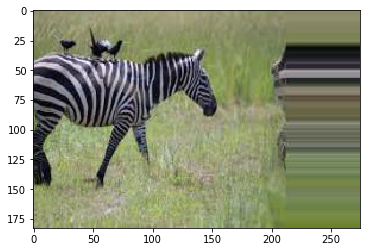

(183, 275, 3)


In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import imageio as imageio
import os, random
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#no rotation, skewing or shearing

img = load_img('images/z0.jpg')  
x = img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
x.shape
print(x.shape)

#image loaded

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='z', save_format='jpeg'):
    i += 1
    if i > 3: #extra image count
        break
        
#augmented data generated

random_file = "preview/"+random.choice(os.listdir("preview"))
print(random_file)
image = imageio.imread(random_file)
plt.imshow(image)
plt.show()
print(image.shape)

In [3]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 19 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [9]:
# TRAINING
model.fit_generator(
        train_generator,
        steps_per_epoch=400 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training

Epoch 1/50
25/25 [==============================] - 50s 2s/step - loss: 0.8962 - acc: 0.6342 - val_loss: 1.8822 - val_acc: 0.0833
Epoch 2/50
25/25 [==============================] - 45s 2s/step - loss: 0.2341 - acc: 0.8941 - val_loss: 7.0971 - val_acc: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 48s 2s/step - loss: 0.1710 - acc: 0.9433 - val_loss: 12.2553 - val_acc: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 46s 2s/step - loss: 0.0142 - acc: 0.9974 - val_loss: 13.8815 - val_acc: 0.0000e+00
Epoch 5/50
25/25 [==============================] - 47s 2s/step - loss: 0.0237 - acc: 0.9949 - val_loss: 15.7203 - val_acc: 0.0000e+00
Epoch 6/50
25/25 [==============================] - 45s 2s/step - loss: 0.2120 - acc: 0.9509 - val_loss: 11.3421 - val_acc: 0.0000e+00
Epoch 7/50
25/25 [==============================] - 46s 2s/step - loss: 0.0224 - acc: 0.9949 - val_loss: 14.5783 - val_acc: 0.0000e+00
Epoch 8/50
25/25 [==============================] - 45s 2s/st